In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import re

## Preprocessing of data

In [100]:
beers = pd.read_csv('./data/open-beer-database.csv', sep=';')
beers = beers.drop(columns=['Category', 'Description','id', 'brewery_id', 'cat_id', 'Universal Product Code', 'Address', 'Standard Reference Method', 'style_id', 'filepath', 'last_mod', 'Coordinates', 'Website', 'add_user'])
beers = beers[beers['Alcohol By Volume'] != 0.0]
beers["Alcohol By Volume"] = beers["Alcohol By Volume"].apply(lambda x: round(x, 4))
beers = beers.rename(columns={"International Bitterness Units": "IBU"})
beers = beers.dropna(subset=['Style'])
beers

,Name,Alcohol By Volume,IBU,Style,Brewer,City,State,Country
2,Possession Porter,5.6,0.0,Porter,Diamond Knot Brewery & Alehouse,Mukilteo,Washington,United States
6,Free Bike Amber,4.5,0.0,American-Style Amber/Red Ale,Skagit River Brewing,Mount Vernon,Washington,United States
19,Potrero ESB,5.2,0.0,Special Bitter or Best Bitter,21st Amendment Brewery Cafe,San Francisco,California,United States
23,Twisted Kilt Scotch Ale,5.0,0.0,Scotch Ale,Thirsty Dog Brewing,Akron,Ohio,United States
25,Grolsch Amber Ale,5.3,0.0,German-Style Brown Ale/Altbier,Grolsche Bierbrouwerij,Enschede,Overijssel,Netherlands
...,...,...,...,...,...,...,...,...
5950,Richbrau India Pale Ale,6.2,0.0,American-Style India Pale Ale,Richbrau Brewing Company,Richmond,Virginia,United States
5951,Dubble Fantasy,5.0,0.0,Other Belgian-Style Ales,San Diego Brewing,San Diego,California,United States
5953,Dragon Stout,7.5,0.0,American-Style Stout,Desnoes & Geddes Ltd,Kingston,NaN,Jamaica
5957,"Double Eagle \""High-Test\"" Scotch Ale",8.0,0.0,Scotch Ale,Pinehurst Village Brewery,Aberdeen,North Carolina,United States


In [101]:
new_beers = pd.read_csv('./data/beers.csv',  index_col="index", names=['index','Alcohol By Volume','IBU','id','Name','Style','brewery_id','ounces'])
new_brewies = pd.read_csv('./data/breweries.csv', index_col="brewery_id", names=['brewery_id','Brewer','City','State','id'])
new_beers = new_beers.merge(new_brewies, on="brewery_id")
new_beers = new_beers.drop(columns=['id_x', 'id_y', 'ounces', 'brewery_id'])
new_beers.insert(7, 'Country', 'United States')
new_beers["Alcohol By Volume"] = new_beers["Alcohol By Volume"].apply(lambda x: round(x, 4))
new_beers = new_beers.dropna(subset=['Style'])
new_beers

,Alcohol By Volume,IBU,Name,Style,Brewer,City,State,Country
0,0.050,NaN,Pub Beer,American Pale Lager,10 Barrel Brewing Company,Bend,OR,United States
1,0.066,NaN,Devil's Cup,American Pale Ale (APA),18th Street Brewery,Gary,IN,United States
2,0.071,NaN,Rise of the Phoenix,American IPA,18th Street Brewery,Gary,IN,United States
3,0.090,NaN,Sinister,American Double / Imperial IPA,18th Street Brewery,Gary,IN,United States
4,0.075,NaN,Sex and Candy,American IPA,18th Street Brewery,Gary,IN,United States
...,...,...,...,...,...,...,...,...
2405,0.067,45.0,Belgorado,Belgian IPA,Wynkoop Brewing Company,Denver,CO,United States
2406,0.052,NaN,Rail Yard Ale,American Amber / Red Ale,Wynkoop Brewing Company,Denver,CO,United States
2407,0.055,NaN,B3K Black Lager,Schwarzbier,Wynkoop Brewing Company,Denver,CO,United States
2408,0.055,40.0,Silverback Pale Ale,American Pale Ale (APA),Wynkoop Brewing Company,Denver,CO,United States


In [103]:
states = {
"AL" : "Alabama",
"AK" : "Alaska",
"AZ" : "Arizona",
"AR" : "Arkansas",
"CA" : "California",
"CO" : "Colorado",
"CT" : "Connecticut",
"DE" : "Delaware",
"FL" : "Florida",
"GA" : "Georgia",
"HI" : "Hawaii",
"ID" : "Idaho",
"IL" : "Illinois",
"IN" : "Indiana",
"IA" : "Iowa",
"KS" : "Kansas",
"KY" : "Kentucky",
"LA" : "Louisiana",
"ME" : "Maine",
"MD" : "Maryland",
"MA" : "Massachusetts",
"MI" : "Michigan",
"MN" : "Minnesota",
"MS" : "Mississippi",
"MO" : "Missouri",
"MT" : "Montana",
"NE" : "Nebraska",
"NV" : "Nevada",
"NH" : "New Hampshire",
"NJ" : "New Jersey",
"NM" : "New Mexico",
"NY" : "New York",
"NC" : "North Carolina",
"ND" : "North Dakota",
"OH" : "Ohio",
"OK" : "Oklahoma",
"OR" : "Oregon",
"PA" : "Pennsylvania",
"RI" : "Rhode Island",
"SC" : "South Carolina",
"SD" : "South Dakota",
"TN" : "Tennessee",
"TX" : "Texas",
"UT" : "Utah",
"VT" : "Vermont",
"VA" : "Virginia",
"WA" : "Washington",
"WV" : "West Virginia",
"WI" : "Wisconsin",
"WY" : "Wyoming",
"DC" : "Washington DC"
}

In [104]:
new_beers["State"] = new_beers["State"].apply(lambda x: states[x.strip()])

In [105]:
concate_beers = beers.append(new_beers)
# concate_beers = beers

In [106]:
concate_beers.to_csv('preprocessed_data.csv')
concate_beers

,Name,Alcohol By Volume,IBU,Style,Brewer,City,State,Country
2,Possession Porter,5.600,0.0,Porter,Diamond Knot Brewery & Alehouse,Mukilteo,Washington,United States
6,Free Bike Amber,4.500,0.0,American-Style Amber/Red Ale,Skagit River Brewing,Mount Vernon,Washington,United States
19,Potrero ESB,5.200,0.0,Special Bitter or Best Bitter,21st Amendment Brewery Cafe,San Francisco,California,United States
23,Twisted Kilt Scotch Ale,5.000,0.0,Scotch Ale,Thirsty Dog Brewing,Akron,Ohio,United States
25,Grolsch Amber Ale,5.300,0.0,German-Style Brown Ale/Altbier,Grolsche Bierbrouwerij,Enschede,Overijssel,Netherlands
...,...,...,...,...,...,...,...,...
2405,Belgorado,0.067,45.0,Belgian IPA,Wynkoop Brewing Company,Denver,Colorado,United States
2406,Rail Yard Ale,0.052,NaN,American Amber / Red Ale,Wynkoop Brewing Company,Denver,Colorado,United States
2407,B3K Black Lager,0.055,NaN,Schwarzbier,Wynkoop Brewing Company,Denver,Colorado,United States
2408,Silverback Pale Ale,0.055,40.0,American Pale Ale (APA),Wynkoop Brewing Company,Denver,Colorado,United States


In [107]:
concate_beers = pd.read_csv('preprocessed_data.csv', index_col=0)

In [108]:
concate_beers

,Name,Alcohol By Volume,IBU,Style,Brewer,City,State,Country
2,Possession Porter,5.600,0.0,Porter,Diamond Knot Brewery & Alehouse,Mukilteo,Washington,United States
6,Free Bike Amber,4.500,0.0,American-Style Amber/Red Ale,Skagit River Brewing,Mount Vernon,Washington,United States
19,Potrero ESB,5.200,0.0,Special Bitter or Best Bitter,21st Amendment Brewery Cafe,San Francisco,California,United States
23,Twisted Kilt Scotch Ale,5.000,0.0,Scotch Ale,Thirsty Dog Brewing,Akron,Ohio,United States
25,Grolsch Amber Ale,5.300,0.0,German-Style Brown Ale/Altbier,Grolsche Bierbrouwerij,Enschede,Overijssel,Netherlands
...,...,...,...,...,...,...,...,...
2405,Belgorado,0.067,45.0,Belgian IPA,Wynkoop Brewing Company,Denver,Colorado,United States
2406,Rail Yard Ale,0.052,NaN,American Amber / Red Ale,Wynkoop Brewing Company,Denver,Colorado,United States
2407,B3K Black Lager,0.055,NaN,Schwarzbier,Wynkoop Brewing Company,Denver,Colorado,United States
2408,Silverback Pale Ale,0.055,40.0,American Pale Ale (APA),Wynkoop Brewing Company,Denver,Colorado,United States


In [109]:
concate_beers[concate_beers['Style'] == 'American Amber / Red Ale']

,Name,Alcohol By Volume,IBU,Style,Brewer,City,State,Country
41,Rod Bender Red,0.059,NaN,American Amber / Red Ale,3 Daughters Brewing,St Petersburg,Florida,United States
45,Reprise Centennial Red,0.060,NaN,American Amber / Red Ale,4 Hands Brewing Company,Saint Louis,Missouri,United States
108,Boont Amber Ale,0.058,15.0,American Amber / Red Ale,Anderson Valley Brewing Company,Boonville,California,United States
111,Boont Amber Ale (2010),0.058,15.0,American Amber / Red Ale,Anderson Valley Brewing Company,Boonville,California,United States
116,Boont Amber Ale (2011),0.058,15.0,American Amber / Red Ale,Anderson Valley Brewing Company,Boonville,California,United States
...,...,...,...,...,...,...,...,...
2329,T-6 Red Ale (2004),0.047,NaN,American Amber / Red Ale,Warbird Brewing Company,Fort Wayne,Indiana,United States
2336,West Sixth Amber Ale,0.055,NaN,American Amber / Red Ale,West Sixth Brewing,Lexington,Kentucky,United States
2351,Drop Kick Ale,0.052,NaN,American Amber / Red Ale,Weston Brewing Company,Weston,Missouri,United States
2406,Rail Yard Ale,0.052,NaN,American Amber / Red Ale,Wynkoop Brewing Company,Denver,Colorado,United States


In [110]:
concate_beers.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4821 entries, 2 to 2409
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               4821 non-null   object 
 1   Alcohol By Volume  4762 non-null   float64
 2   IBU                3819 non-null   float64
 3   Style              4821 non-null   object 
 4   Brewer             4821 non-null   object 
 5   City               4802 non-null   object 
 6   State              4661 non-null   object 
 7   Country            4821 non-null   object 
dtypes: float64(2), object(6)
memory usage: 339.0+ KB


In [111]:
values = {'Alcohol By Volume': 0.0, 'City': '', 'State': '', 'International Bitterness Units': 0.0}
concate_beers = concate_beers.fillna(value=values)

In [112]:
concate_beers.groupby('Style').size().index

Index(['Abbey Single Ale', 'Altbier', 'American Adjunct Lager',
       'American Amber / Red Ale', 'American Amber / Red Lager',
       'American Barleywine', 'American Black Ale', 'American Blonde Ale',
       'American Brown Ale', 'American Dark Wheat Ale',
       ...
       'Special Bitter or Best Bitter', 'Specialty Beer', 'Strong Ale',
       'Sweet Stout', 'Traditional German-Style Bock', 'Tripel',
       'Vienna Lager', 'Wheat Ale', 'Winter Warmer', 'Witbier'],
      dtype='object', name='Style', length=159)

In [113]:
Ale[Ale.Style.str.contains('^(?!.*(Pale).*)', regex= True, na=False)].groupby('Style').size().index

NameError: name 'Ale' is not defined

In [114]:
print('-----------------------------------ALE------------------------')

Ale = concate_beers[concate_beers.Style.str.contains('.*(Ale|IPA|APA).*', regex= True, na=False)]
print("Ale", Ale.shape[0], len(Ale.groupby('Style').size().index))
print(Ale.groupby('Style').size().index, '\n')

APA = concate_beers[concate_beers.Style.str.contains('.*(American.*Pale.*Ale|APA).*', regex= True, na=False)]
print("APA", APA.shape[0], len(APA.groupby('Style').size().index)) 
print(APA.groupby('Style').size().index, '\n')

MildAle = concate_beers[concate_beers.Style.str.contains('.*Mild.*Ale.*', regex= True, na=False)]
print("MildAle", MildAle.shape[0], len(MildAle.groupby('Style').size().index)) 
print(MildAle.groupby('Style').size().index, '\n')

IPA = concate_beers[concate_beers.Style.str.contains('.*(India.*Pale.*Ale|IPA).*', regex= True, na=False)] 
print("IPA", IPA.shape[0], len(IPA.groupby('Style').size().index))
print(IPA.groupby('Style').size().index, '\n')

OtherAle = concate_beers[concate_beers.Style.str.contains('^(?!.*(American.*Pale.*Ale|APA|IPA|India.*Pale.*Ale|Mild.*Ale).*).*Ale.*', regex= True, na=False)]
print("OtherAle", OtherAle.shape[0], len(OtherAle.groupby('Style').size().index))
print(OtherAle.groupby('Style').size().index, '\n')

print('-----------------------------------Porter------------------------')

Porter = concate_beers[concate_beers.Style.str.contains('.*Porter.*', regex= True, na=False)]
print("Porter", Porter.shape[0], len(Porter.groupby('Style').size().index))
print(Porter.groupby('Style').size().index, '\n')

print('-----------------------------------Stout------------------------')

Stout = concate_beers[concate_beers.Style.str.contains('.*Stout.*', regex= True, na=False)]
print("Stout", Stout.shape[0], len(Stout.groupby('Style').size().index))
print(Stout.groupby('Style').size().index, '\n')

print('-----------------------------------Lager------------------------')

Lager = concate_beers[concate_beers.Style.str.contains('.*Lager.*', regex= True, na=False)]
print("Lager", Lager.shape[0], len(Lager.groupby('Style').size().index))
print(Lager.groupby('Style').size().index, '\n')

print('-----------------------------------Others------------------------')

Others = concate_beers[concate_beers.Style.str.contains('.*Beer.*', regex= True, na=False)]
print("Others", Others.shape[0], len(Others.groupby('Style').size().index))
print(Others.groupby('Style').size().index, '\n')

Shandy = concate_beers[concate_beers.Style.str.contains('.*Shandy.*', regex= True, na=False)]
print("Shandy", Shandy.shape[0], len(Shandy.groupby('Style').size().index))
print(Shandy.groupby('Style').size().index, '\n')

-----------------------------------ALE------------------------
Ale 2741 61
Index(['Abbey Single Ale', 'American Amber / Red Ale', 'American Black Ale',
       'American Blonde Ale', 'American Brown Ale', 'American Dark Wheat Ale',
       'American Double / Imperial IPA', 'American IPA',
       'American Pale Ale (APA)', 'American Pale Wheat Ale',
       'American Rye Ale or Lager', 'American Strong Ale',
       'American White IPA', 'American Wild Ale',
       'American-Style Amber/Red Ale', 'American-Style Barley Wine Ale',
       'American-Style Brown Ale', 'American-Style Cream Ale or Lager',
       'American-Style India Black Ale', 'American-Style India Pale Ale',
       'American-Style Pale Ale', 'American-Style Strong Pale Ale',
       'Belgian Dark Ale', 'Belgian IPA', 'Belgian Pale Ale',
       'Belgian Strong Dark Ale', 'Belgian Strong Pale Ale',
       'Belgian-Style Dark Strong Ale', 'Belgian-Style Pale Ale',
       'Belgian-Style Pale Strong Ale', 'Classic English-Style Pal

C:\Users\matho\anaconda3\lib\site-packages\pandas\core\strings.py:1952: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



In [115]:
concate_beers = concate_beers.reset_index()
concate_beers = concate_beers.drop(columns=['index', 'Type', 'AleType', 'Ale'])
concate_beers

KeyError: "['Type' 'AleType' 'Ale'] not found in axis"

In [116]:
conditions = [
    concate_beers.Style.str.contains('.*Porter.*', regex= True, na=False),
    concate_beers.Style.str.contains('.*Stout.*', regex= True, na=False),
    concate_beers.Style.str.contains('.*Lager.*', regex= True, na=False),
    concate_beers.Style.str.contains('.*(American.*Pale.*Ale|APA).*', regex= True, na=False),
    concate_beers.Style.str.contains('.*Mild.*Ale.*', regex= True, na=False),
    concate_beers.Style.str.contains('.*(India.*Pale.*Ale|IPA).*', regex= True, na=False),
    concate_beers.Style.str.contains('^(?!.*(American.*Pale.*Ale|APA|IPA|India.*Pale.*Ale|Mild.*Ale).*).*Ale.*', regex= True, na=False),
    concate_beers.Style.str.contains('.*(Beer|Special).*', regex= True, na=False)
]

outputs = [
    'Porter',
    'Stout',
    'Lager',
    'APA',
    'Mild Ale',
    'IPA',
    'Other Ale',
    'Special Beer'
]

res = np.select(conditions, outputs, 'Others')

In [117]:
concate_beers['Type'] = pd.Series(res)
concate_beers.groupby('Type').size()

Type
APA              771
IPA              676
Lager            477
Mild Ale          18
Other Ale       1191
Others           948
Porter           189
Special Beer     218
Stout            333
dtype: int64

In [118]:
concate_beers['Ale'] = np.where(concate_beers.Style.str.contains('.*(Ale|IPA|APA).*', regex= True, na=False), 'Ale', 'No Ale')

In [119]:
concate_beers

,index,Name,Alcohol By Volume,IBU,Style,Brewer,City,State,Country,Type,Ale
0,2,Possession Porter,5.600,0.0,Porter,Diamond Knot Brewery & Alehouse,Mukilteo,Washington,United States,Porter,No Ale
1,6,Free Bike Amber,4.500,0.0,American-Style Amber/Red Ale,Skagit River Brewing,Mount Vernon,Washington,United States,Other Ale,Ale
2,19,Potrero ESB,5.200,0.0,Special Bitter or Best Bitter,21st Amendment Brewery Cafe,San Francisco,California,United States,Special Beer,No Ale
3,23,Twisted Kilt Scotch Ale,5.000,0.0,Scotch Ale,Thirsty Dog Brewing,Akron,Ohio,United States,Other Ale,Ale
4,25,Grolsch Amber Ale,5.300,0.0,German-Style Brown Ale/Altbier,Grolsche Bierbrouwerij,Enschede,Overijssel,Netherlands,Other Ale,Ale
...,...,...,...,...,...,...,...,...,...,...,...
4816,2405,Belgorado,0.067,45.0,Belgian IPA,Wynkoop Brewing Company,Denver,Colorado,United States,IPA,Ale
4817,2406,Rail Yard Ale,0.052,NaN,American Amber / Red Ale,Wynkoop Brewing Company,Denver,Colorado,United States,Other Ale,Ale
4818,2407,B3K Black Lager,0.055,NaN,Schwarzbier,Wynkoop Brewing Company,Denver,Colorado,United States,Others,No Ale
4819,2408,Silverback Pale Ale,0.055,40.0,American Pale Ale (APA),Wynkoop Brewing Company,Denver,Colorado,United States,APA,Ale


In [120]:
concate_beers.to_csv('preprocessed_data.csv')
concate_beers

,index,Name,Alcohol By Volume,IBU,Style,Brewer,City,State,Country,Type,Ale
0,2,Possession Porter,5.600,0.0,Porter,Diamond Knot Brewery & Alehouse,Mukilteo,Washington,United States,Porter,No Ale
1,6,Free Bike Amber,4.500,0.0,American-Style Amber/Red Ale,Skagit River Brewing,Mount Vernon,Washington,United States,Other Ale,Ale
2,19,Potrero ESB,5.200,0.0,Special Bitter or Best Bitter,21st Amendment Brewery Cafe,San Francisco,California,United States,Special Beer,No Ale
3,23,Twisted Kilt Scotch Ale,5.000,0.0,Scotch Ale,Thirsty Dog Brewing,Akron,Ohio,United States,Other Ale,Ale
4,25,Grolsch Amber Ale,5.300,0.0,German-Style Brown Ale/Altbier,Grolsche Bierbrouwerij,Enschede,Overijssel,Netherlands,Other Ale,Ale
...,...,...,...,...,...,...,...,...,...,...,...
4816,2405,Belgorado,0.067,45.0,Belgian IPA,Wynkoop Brewing Company,Denver,Colorado,United States,IPA,Ale
4817,2406,Rail Yard Ale,0.052,NaN,American Amber / Red Ale,Wynkoop Brewing Company,Denver,Colorado,United States,Other Ale,Ale
4818,2407,B3K Black Lager,0.055,NaN,Schwarzbier,Wynkoop Brewing Company,Denver,Colorado,United States,Others,No Ale
4819,2408,Silverback Pale Ale,0.055,40.0,American Pale Ale (APA),Wynkoop Brewing Company,Denver,Colorado,United States,APA,Ale


In [121]:
print(concate_beers.groupby(['Ale']).size(),'\n')
print(concate_beers.groupby(['Style']).size(),'\n')
print(concate_beers.groupby(['Type']).size(),'\n')

Ale
Ale       2741
No Ale    2080
dtype: int64 

Style
Abbey Single Ale                2
Altbier                        13
American Adjunct Lager         18
American Amber / Red Ale      133
American Amber / Red Lager     29
                             ... 
Tripel                         11
Vienna Lager                   20
Wheat Ale                       1
Winter Warmer                  36
Witbier                        51
Length: 159, dtype: int64 

Type
APA              771
IPA              676
Lager            477
Mild Ale          18
Other Ale       1191
Others           948
Porter           189
Special Beer     218
Stout            333
dtype: int64 



In [128]:
concate_beers.groupby('Style').size()['Fruit / Vegetable Beer']
# 
concate_beers[concate_beers['Style'] == 'Fruit / Vegetable Beer'].groupby('Country').size()

Country
United States    49
dtype: int64

## How to show data on interactive map 

In [123]:
TABLE_DATA = concate_beers
len(TABLE_DATA.groupby('Country'))

43

In [124]:
df = px.data.gapminder().query("year==2007")
df = df.drop(columns=['year', 'lifeExp', 'pop', 'gdpPercap'])
df = df.rename(columns={"country": "Country", "iso_alpha": "Country ID"})
df

,Country,continent,Country ID,iso_num
11,Afghanistan,Asia,AFG,4
23,Albania,Europe,ALB,8
35,Algeria,Africa,DZA,12
47,Angola,Africa,AGO,24
59,Argentina,Americas,ARG,32
...,...,...,...,...
1655,Vietnam,Asia,VNM,704
1667,West Bank and Gaza,Asia,PSE,275
1679,"Yemen, Rep.",Asia,YEM,887
1691,Zambia,Africa,ZMB,894


In [125]:
MAP_DATA.to_csv('map_data.csv')

In [126]:
MAP_DATA = pd.read_csv('map_data.csv', index_col=0)
origin_country = TABLE_DATA.groupby('Country').size()

origin_country["United States"] = origin_country["United States"] / 52
MAP_DATA['Created Beer'] = MAP_DATA['Country'].apply(lambda x: origin_country[x] if x in origin_country.index else 0 )
MAP_DATA = MAP_DATA.loc[MAP_DATA['Created Beer'] != 0]
MAP_DATA.reset_index(drop=True)
MAP_DATA

,Country,continent,Country ID,iso_num,Created Beer
0,Argentina,Americas,ARG,32,4
1,Australia,Oceania,AUS,36,15
2,Austria,Europe,AUT,40,10
3,Belgium,Europe,BEL,56,91
4,Brazil,Americas,BRA,76,2
5,Canada,Americas,CAN,124,57
6,Czech Republic,Europe,CZE,203,5
7,Denmark,Europe,DNK,208,5
8,El Salvador,Americas,SLV,222,1
9,Finland,Europe,FIN,246,1


In [20]:
# Will create interactive map with values in column="Created Beer"
import plotly.express as px


# df = df[(df.Country != "United States") & (df.Country != "Belgium")]
fig = px.choropleth(df, locations="Country ID",
                    color="Created Beer", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

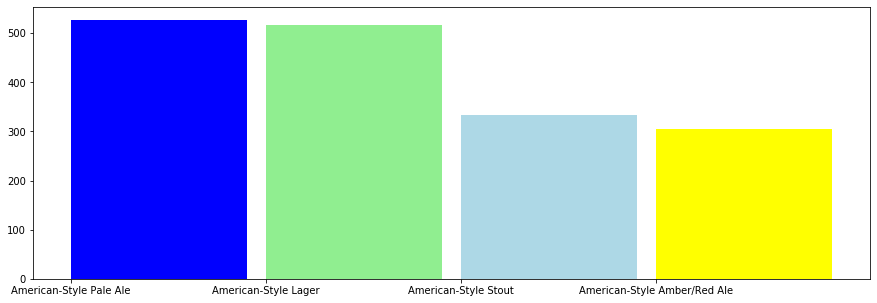

In [109]:
most_common_type = concate_beers.groupby('Style').size().sort_values(ascending=False)
how_many = 4

import matplotlib.pyplot as plt
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])

# ax.bar(most_common_type.index[:how_many], most_common_type[:how_many])

plt.figure(figsize=(15, 5))  # width:20, height:3
plt.bar(most_common_type.index[:how_many], most_common_type[:how_many], align='edge', width=0.9, color=['blue', 'lightgreen', 'lightblue', 'yellow'])
plt.show()